In [1]:
import pickle
from Library.preprocess import *
from matplotlib import font_manager, rc


rc('font', family='AppleGothic')
pd.set_option('display.max_columns', None)

# attack

In [2]:
with open('datas/attack.pkl', 'rb') as f:
    attack_df = pickle.load(f)

In [3]:
attack_df = preprocess_df(attack_df)
attack_df.tail()

,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,position,foot,club,outfitter,cup,Tackles,Inter,Fouls,Offsides,Clear,Drbed,Blocks,OwnG,Rating,Goals,Assists,SpG,Fouled,Off,Disp,UnsTch,Drb,KeyP,AvgP,PS,Crosses,LongB,ThrB,AerialsWon,MotM,period,total_out
601,1800000,10,0.100000,0.0,0.100000,0.0,0.1,26,177,Centre-Forward,right,0,adidas,0,0.2,0.1,0.8,0.0,0.0,0.5,0.0,0.0,5.95,0.000000,0.0,0.4,0.3,0.0,0.7,1.2,0.4,0.5,10.2,75.9,0.1,0.4,0.0,1.0,0.0,1.8,0.1
602,2700000,33,0.272727,0.0,0.060606,0.0,0.0,24,175,Centre-Forward,right,0,Puma,3,0.4,0.1,0.6,0.0,0.2,0.2,0.0,0.0,6.45,0.272727,0.0,0.9,1.2,0.5,0.9,2.0,0.8,0.3,8.8,77.5,0.0,0.3,0.0,0.5,0.0,3.0,0.0
603,1080000,19,0.000000,0.0,0.105263,0.0,0.0,33,182,Centre-Forward,right,0,Puma,0,0.4,0.3,0.6,0.0,0.2,0.3,0.0,0.0,6.05,0.000000,0.0,0.5,0.8,0.2,0.5,1.4,0.1,0.2,7.4,74.3,0.1,0.1,0.0,0.7,0.0,1.0,0.0
604,900000,13,0.000000,0.0,0.000000,0.0,0.0,26,192,Centre-Forward,right,0,Puma,1,0.2,0.0,0.2,0.0,0.2,0.4,0.0,0.0,6.06,0.000000,0.0,0.6,0.2,0.0,0.2,1.0,0.2,0.2,5.1,57.6,0.0,0.0,0.0,0.9,0.0,4.0,0.0
605,315000,1,0.000000,0.0,0.000000,0.0,0.0,23,185,Centre-Forward,right,0,Puma,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.17,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,50.0,0.0,0.0,0.0,1.0,0.0,5.2,0.0


In [4]:
attack_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   market_value    606 non-null    int64  
 1   app             606 non-null    int64  
 2   conceded_goals  606 non-null    float64
 3   clean_sheets    606 non-null    float64
 4   yellow_card     606 non-null    float64
 5   second_yell     606 non-null    float64
 6   red_card        606 non-null    float64
 7   age             606 non-null    int64  
 8   height          606 non-null    int64  
 9   position        606 non-null    object 
 10  foot            606 non-null    object 
 11  club            606 non-null    int64  
 12  outfitter       606 non-null    object 
 13  cup             606 non-null    int64  
 14  Tackles         606 non-null    float64
 15  Inter           606 non-null    float64
 16  Fouls           606 non-null    float64
 17  Offsides        606 non-null    flo

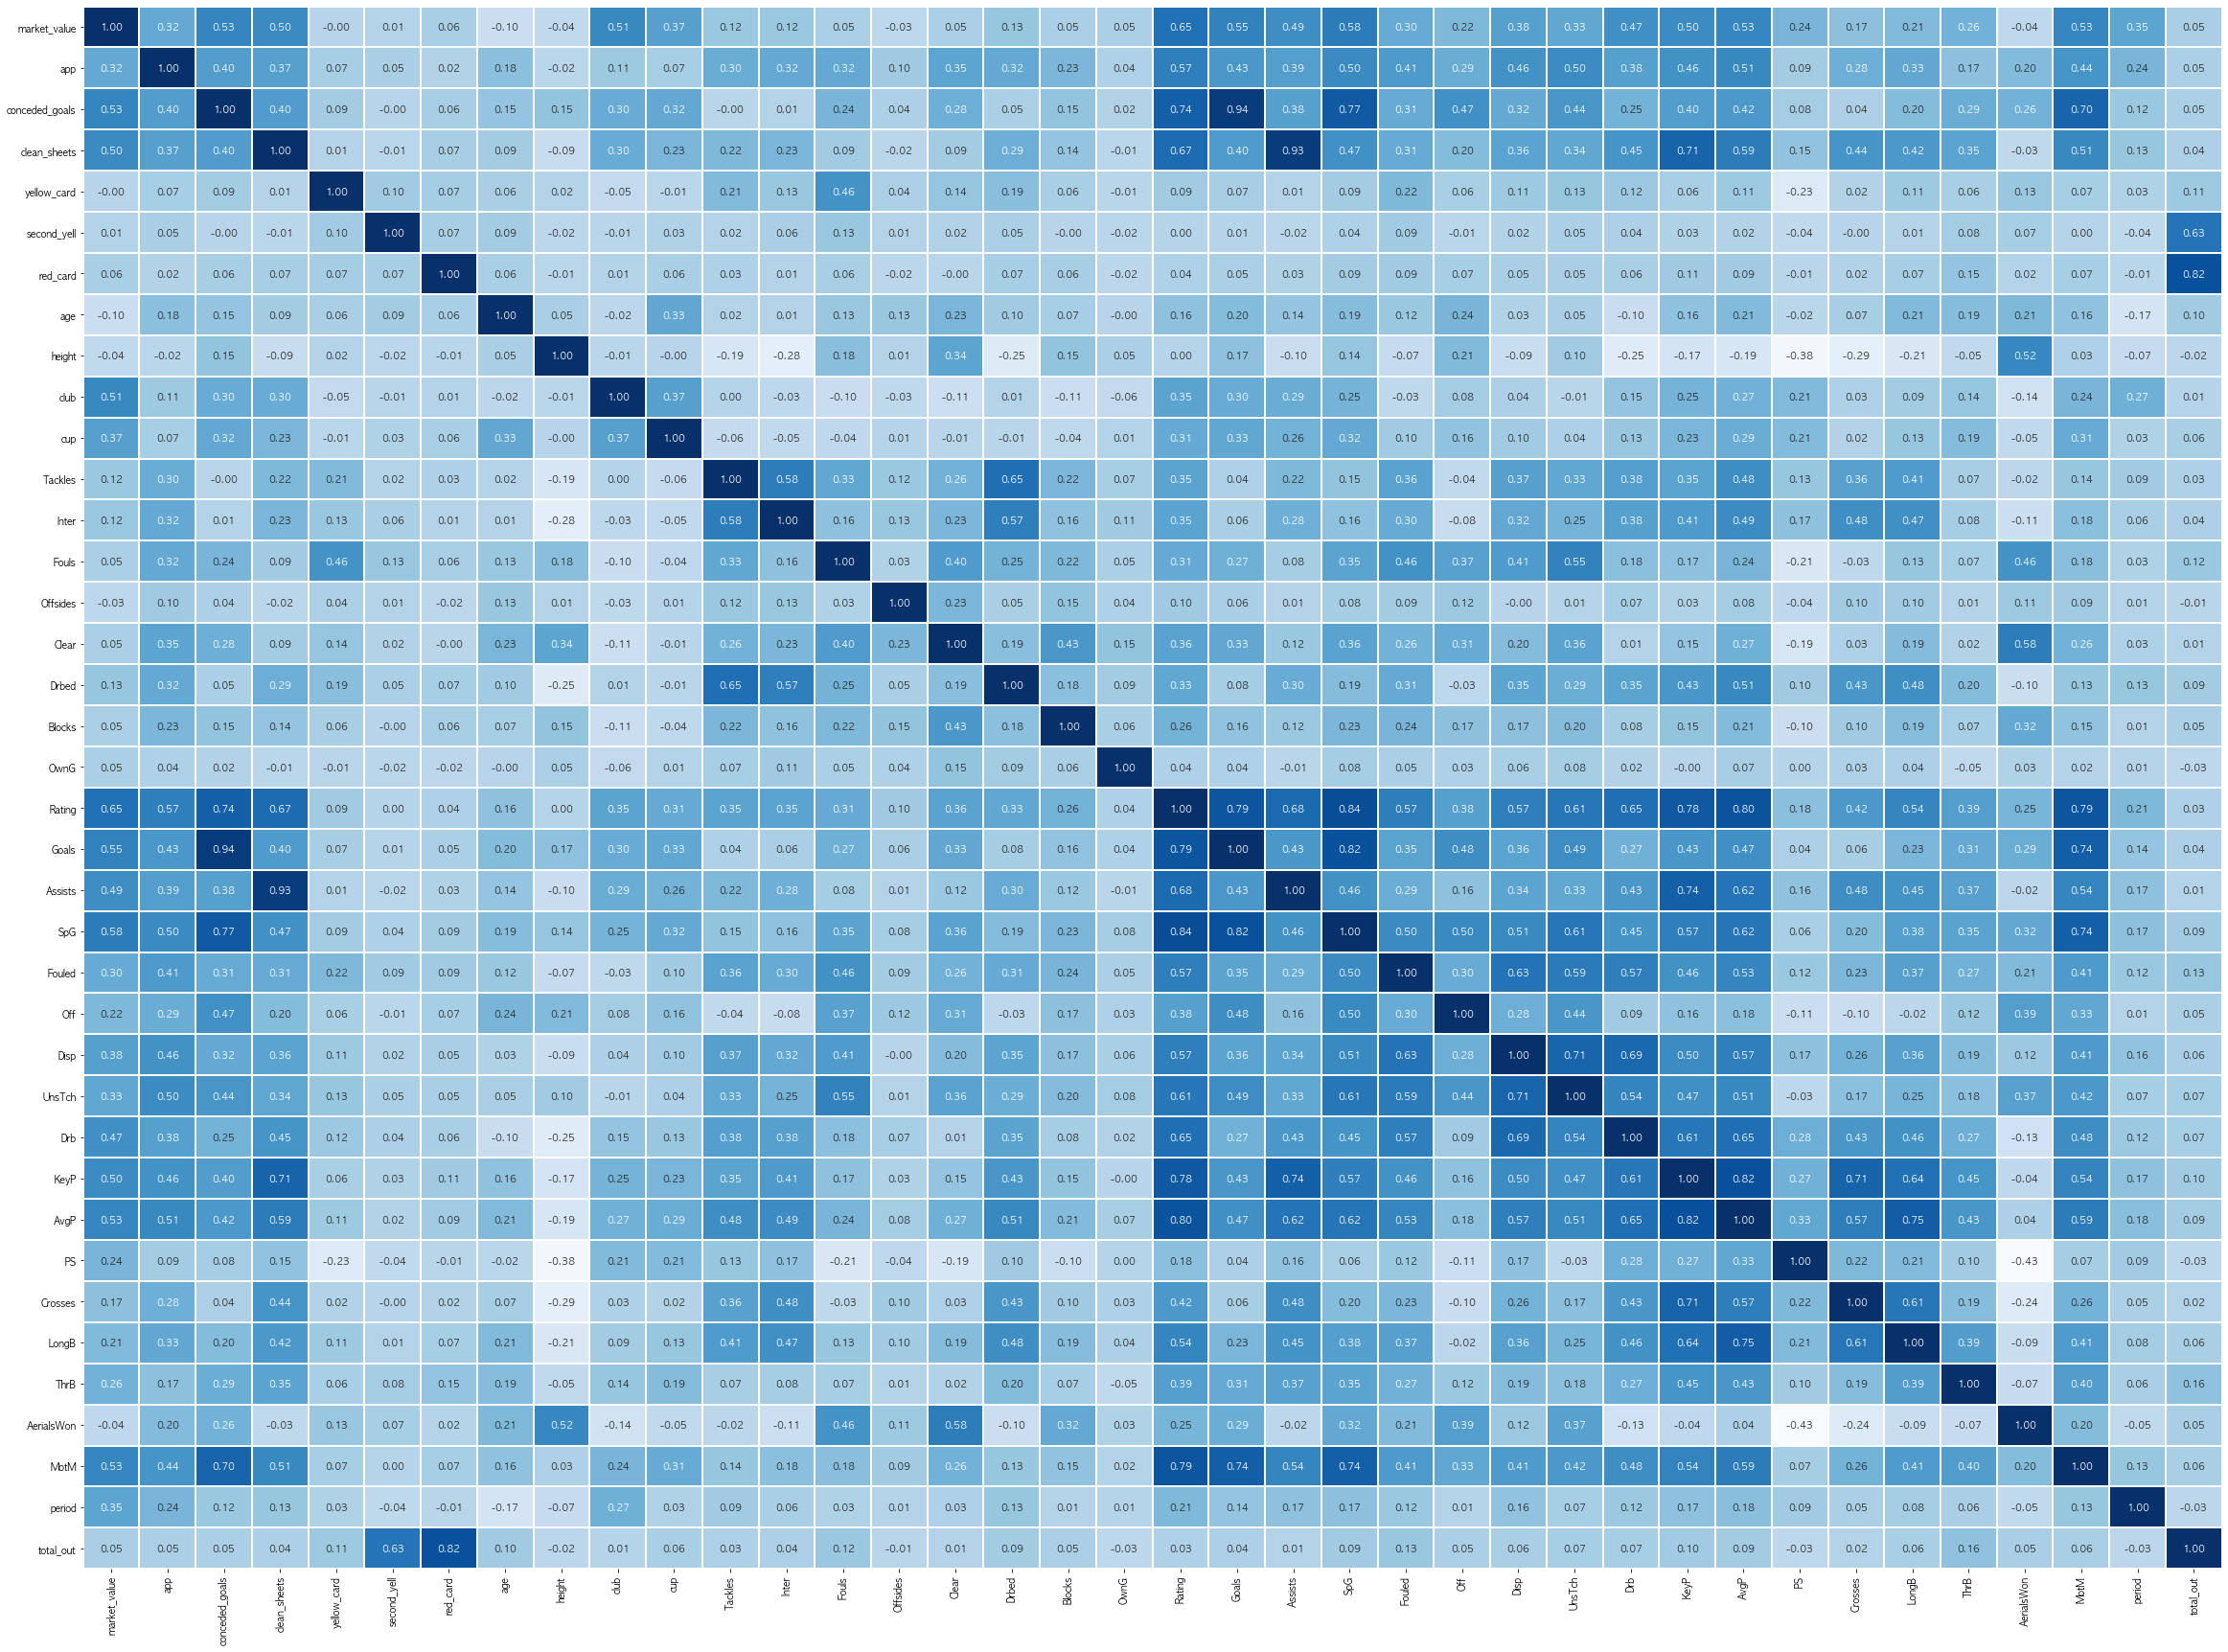

In [5]:
plt.figure(figsize=(40, 30))

sns.heatmap(attack_df.corr(), cbar=False, linewidths=0.3,
           annot=True, fmt=".2f", cmap="Blues");

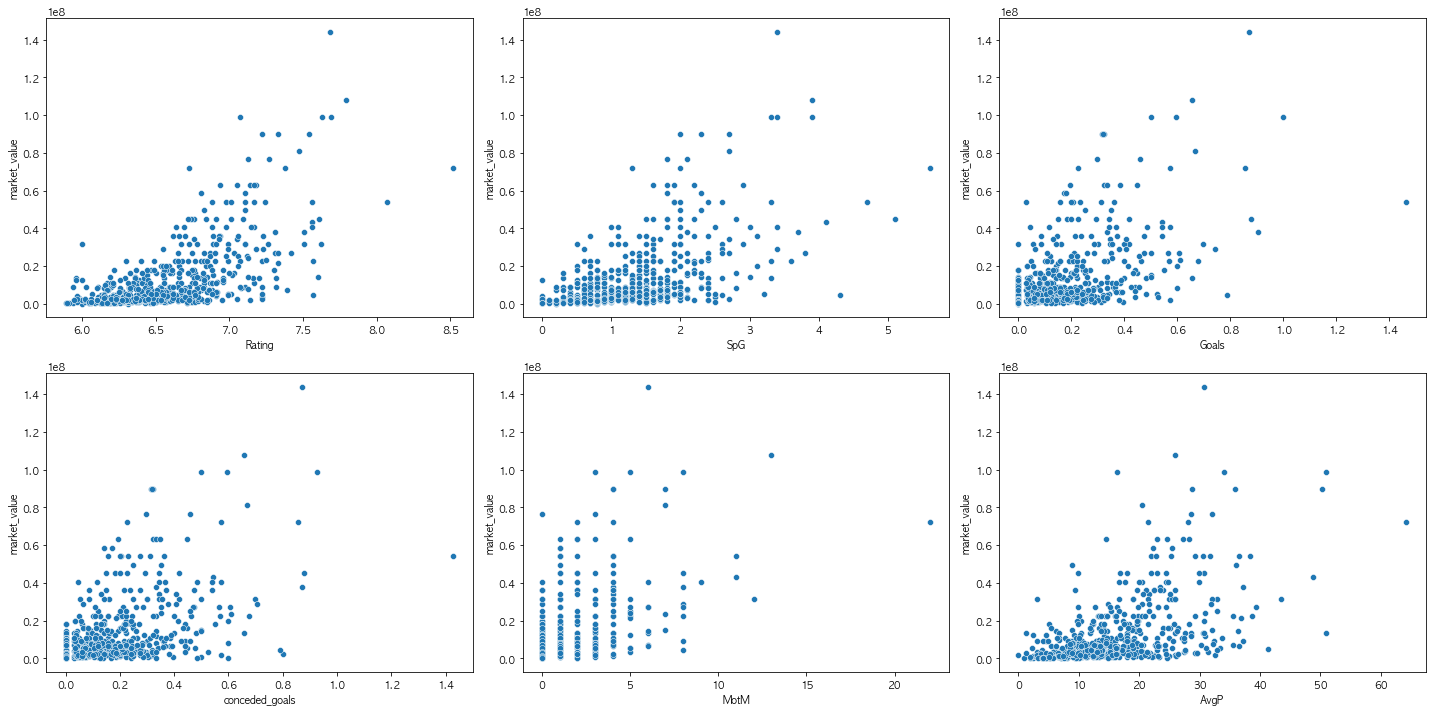

In [6]:
cor_top6 = attack_df.corr().loc['market_value'].sort_values(ascending=False)[1:7]

plt.figure(figsize=(20, 10))
for i, col in enumerate(cor_top6.index):
    plt.subplot(231+i)
    sns.scatterplot(data=attack_df, x=col, y='market_value')

plt.tight_layout()
plt.show()

- Nike, adidas, Puma 외의 class들을 others로 grouping

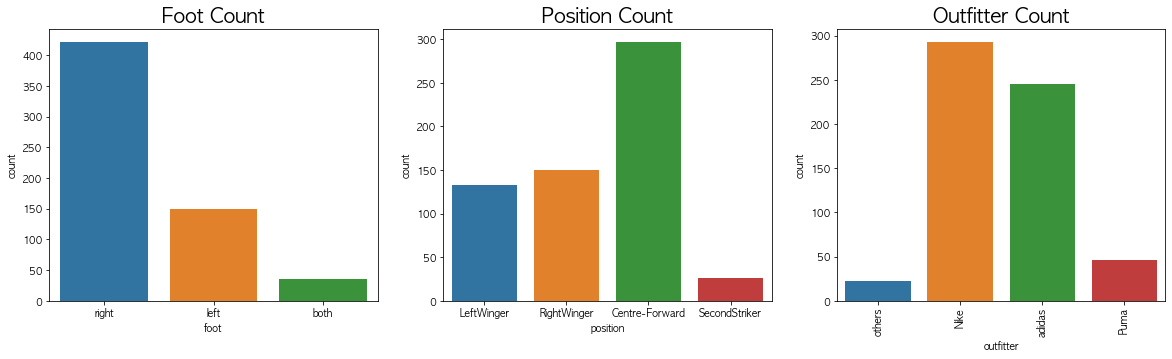

In [7]:
plt.figure(figsize=(20, 5))

plt.subplot(131)
sns.countplot(data=attack_df, x='foot')
plt.title("Foot Count", fontsize=20)

plt.subplot(132)
sns.countplot(data=attack_df, x='position')
plt.title("Position Count", fontsize=20)

plt.subplot(133)
sns.countplot(data=attack_df, x='outfitter')
plt.xticks(rotation=90)
plt.title("Outfitter Count", fontsize=20)

plt.show()

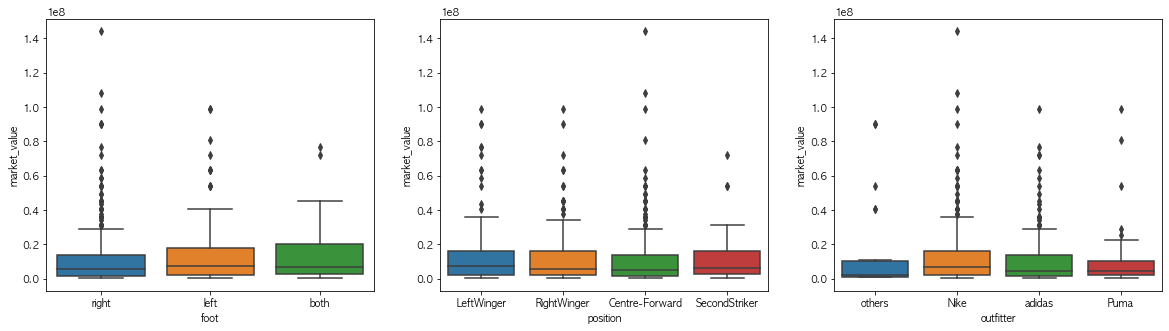

In [8]:
plt.figure(figsize=(20, 5))

plt.subplot(131)
sns.boxplot(data=attack_df, x='foot', y='market_value')

plt.subplot(132)
sns.boxplot(data=attack_df, x='position', y='market_value')

plt.subplot(133)
sns.boxplot(data=attack_df, x='outfitter', y='market_value')

plt.show()

# midfield

In [9]:
with open('datas/midfield.pkl', 'rb') as f:
    midfield_df = pickle.load(f)

In [10]:
midfield_df = preprocess_df(midfield_df)
midfield_df.tail()

,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,position,foot,club,outfitter,cup,Tackles,Inter,Fouls,Offsides,Clear,Drbed,Blocks,OwnG,Rating,Goals,Assists,SpG,Fouled,Off,Disp,UnsTch,Drb,KeyP,AvgP,PS,Crosses,LongB,ThrB,AerialsWon,MotM,period,total_out
638,3600000,38,0.289474,0.0,0.078947,0.0,0.0,28,181,RightMidfield,right,0,Nike,0,1.4,0.9,0.8,0.0,1.2,1.5,0.3,0.0,6.74,0.289474,0.026316,1.8,1.7,0.1,1.3,1.9,0.7,0.5,27.7,69.5,0.2,1.1,0.1,1.9,0.0,4.0,0.0
639,270000,2,0.000000,0.0,0.000000,0.0,0.0,23,181,RightMidfield,right,0,Nike,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.03,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,50.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
640,2700000,30,0.133333,0.1,0.033333,0.0,0.0,25,178,LeftMidfield,left,0,Nike,0,0.9,0.8,0.8,0.0,0.4,0.4,0.0,0.0,6.60,0.133333,0.100000,0.8,1.4,0.1,0.4,1.5,0.3,1.2,12.4,69.0,1.3,0.4,0.0,0.6,1.0,3.0,0.0
641,720000,20,0.000000,0.1,0.050000,0.0,0.0,27,185,LeftMidfield,right,0,Nike,1,0.8,0.4,0.5,0.1,0.1,0.8,0.0,0.0,6.45,0.000000,0.100000,0.8,0.6,0.1,0.9,1.2,1.6,0.7,13.9,78.7,0.2,0.6,0.1,0.6,0.0,2.0,0.0
642,2700000,23,0.000000,0.0,0.086957,0.0,0.0,22,170,AttackingMidfield,right,0,Nike,0,0.7,0.2,0.3,0.0,0.2,0.8,0.0,0.0,6.34,0.000000,0.000000,0.8,1.1,0.0,1.3,2.0,0.7,1.1,22.0,82.6,0.9,1.4,0.1,0.3,0.0,3.0,0.0


In [11]:
midfield_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   market_value    643 non-null    int64  
 1   app             643 non-null    int64  
 2   conceded_goals  643 non-null    float64
 3   clean_sheets    643 non-null    float64
 4   yellow_card     643 non-null    float64
 5   second_yell     643 non-null    float64
 6   red_card        643 non-null    float64
 7   age             643 non-null    int64  
 8   height          643 non-null    int64  
 9   position        643 non-null    object 
 10  foot            643 non-null    object 
 11  club            643 non-null    int64  
 12  outfitter       643 non-null    object 
 13  cup             643 non-null    int64  
 14  Tackles         643 non-null    float64
 15  Inter           643 non-null    float64
 16  Fouls           643 non-null    float64
 17  Offsides        643 non-null    flo

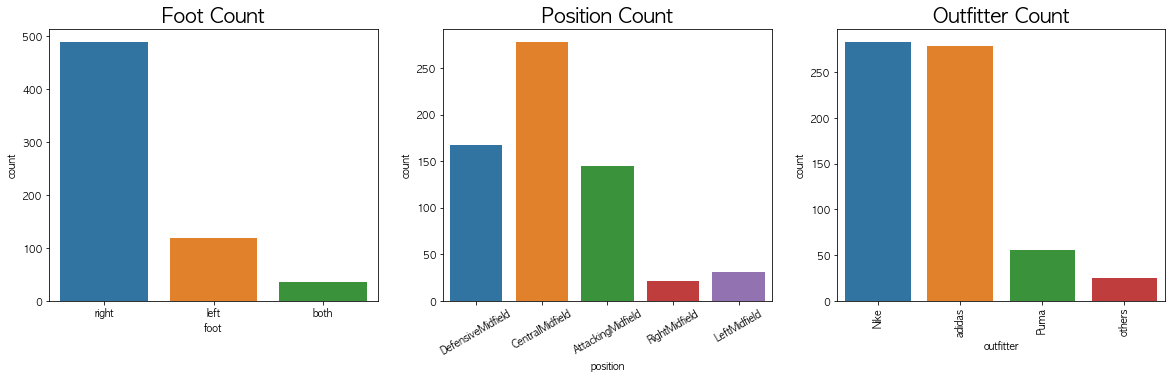

In [12]:
plt.figure(figsize=(20, 5))

plt.subplot(131)
sns.countplot(data=midfield_df, x='foot')
plt.title("Foot Count", fontsize=20)

plt.subplot(132)
sns.countplot(data=midfield_df, x='position')
plt.title("Position Count", fontsize=20)
plt.xticks(rotation=30)

plt.subplot(133)
sns.countplot(data=midfield_df, x='outfitter')
plt.xticks(rotation=90)
plt.title("Outfitter Count", fontsize=20)

plt.show()

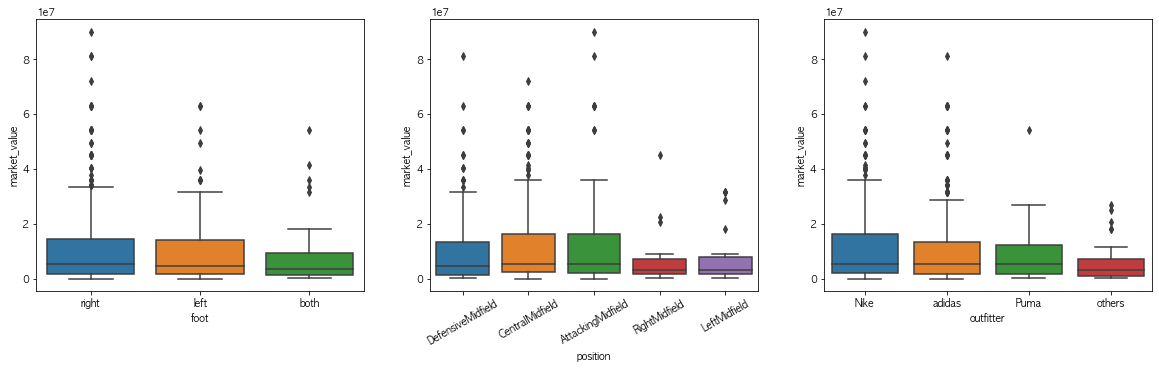

In [13]:
plt.figure(figsize=(20, 5))

plt.subplot(131)
sns.boxplot(data=midfield_df, x='foot', y='market_value')

plt.subplot(132)
sns.boxplot(data=midfield_df, x='position', y='market_value')
plt.xticks(rotation=30)

plt.subplot(133)
sns.boxplot(data=midfield_df, x='outfitter', y='market_value')

plt.show()